# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [29]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 
Both PCA and ICA involve projecting data along different axis. 
In PCA, one would expect the new components to be arranged based on the level of covariance in the data. The first component will establish more covariance than the next one.
In ICA, one would expect to find eigen vectors and eigen values. The Vectors are computed independent of the other features. The number of vectors here should be equal to the number of features in the dataset. 

### PCA

In [30]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA().fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

**Answer:** 
I'll say the variance drops very quickly. Information from the explained variance ratio shows that the first two components have a total variance of 0.86478589 which is pretty significant. The other four components do not add as much variance as the first two. For my analysis, I will choose two dimensions because the first two dimensions seem to describe the data quite well(>86% of the variance explained) without loosing much information.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimensions represents the principal components. The pricinpal components represents the features in the dataset projected onto a different plain. Principal component analysis can be used to reduce number of features used to describe the dataset with negligible information loss.

### ICA

In [31]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import RobustScaler
ica = FastICA().fit(data)

# Print the independent components
print RobustScaler().fit_transform(ica.components_)


[[ -3.91066478e-02   8.17907411e-01  -1.55843418e+00  -3.22463536e-01
    6.62180881e-01   7.30527710e-01]
 [ -1.84326817e-01   1.12681525e+00   2.20278503e+00  -1.41008320e+00
   -6.34562929e+00  -3.39727946e-01]
 [  3.91066478e-02  -4.66277629e+00   1.03925130e+00   3.22463536e-01
   -6.80073654e-01   1.33468768e+00]
 [  1.12293542e+00   9.42162438e-02  -1.97503356e-02   4.72825271e-01
    5.00552911e-03  -2.12998250e+00]
 [  8.18198398e+00  -4.52615094e-01  -2.80915144e-01  -6.45532372e-01
    6.49922660e-01   3.39727946e-01]
 [ -1.34153589e+00  -9.42162438e-02   1.97503356e-02   1.03964941e+01
   -5.00552911e-03  -3.76320326e-01]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

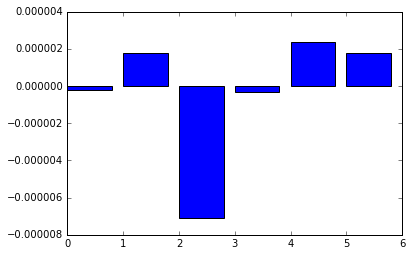

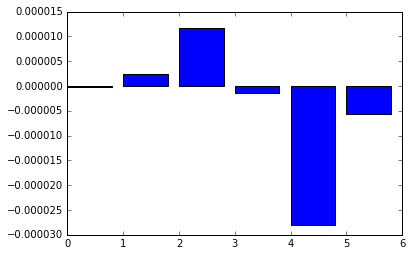

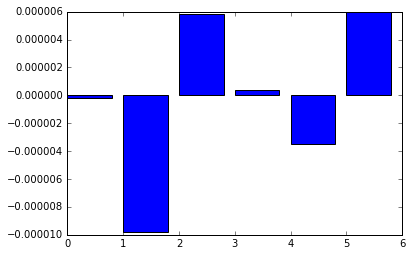

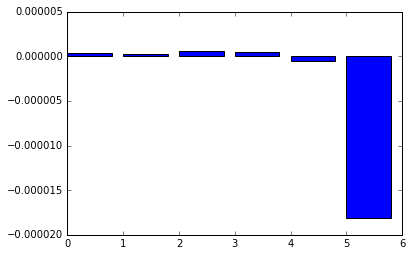

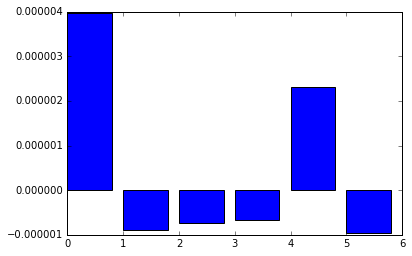

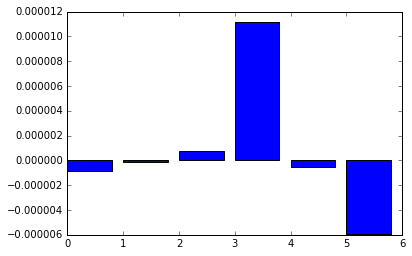

In [41]:
for x in ica.components_:
    plt.bar([0,1,2,3,4,5], x)
    plt.show()

Answer: 
Component 1 shows 3rd feature to be the most prominent
Component 2 shows 5th feature to be the most prominent
Component 3 shows 2nd feature to be the most prominent
Component 4 shows 6th feature to be the most prominent
Component 5 shows 1st feature to be the most prominent
Component 6 shows 4th feature to be the most prominent

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: K Means clustering groups each data point into distinct clusters while Gaussian Mixture Models usually has datapoints belonging to more than one cluster.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [43]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [44]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(ica.transform(data))
print reduced_data[:10]  # print upto 10 elements

[[-0.00529583  0.00805883]
 [ 0.01191077  0.00765666]
 [-0.04377736 -0.09862162]
 [ 0.02210791 -0.00546948]
 [-0.00996635 -0.06781417]
 [-0.00666636  0.00707997]
 [-0.02102042 -0.00789211]
 [ 0.00361871 -0.03302998]
 [ 0.01485155 -0.00808694]
 [ 0.01338341 -0.01122534]]


In [45]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans().fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [46]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [47]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids

[[ 0.04360338 -0.00435555]
 [-0.01221883 -0.04662963]
 [-0.09108734  0.00827222]
 [ 0.01000683  0.04678118]
 [ 0.01583183 -0.33649584]
 [-0.00568662 -0.00120153]
 [ 0.17351344  0.04049574]
 [-0.16707621  0.32796335]]


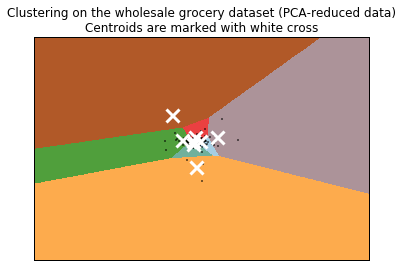

In [51]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: The central object in each cluster represents a generalization for other objects in the cluster. If we are dealing with customers, the central object represents a central customer which best whose features best describes other customers in the cluster.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: KMeans. 

**9)** How would you use that technique to help the company design new experiments?

Answer: KMeans is a technique that can provide insights into data, especially one where you don't have a descriptive target.

**10)** How would you use that data to help you predict future customer needs?

Answer: The segments made visible by KMeans can be used to predict customer needs in the future. In future, if we want to predict the needs of a customer, we only need to find the closest centroid to the customer, and apply the features of the centroid to the customer.